In [21]:
#Imports
import os
from pathlib import Path
from nufeb_tools import utils,plot,spatial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed
import joblib
import shutil
from scipy.spatial import Voronoi, voronoi_plot_2d

In [22]:
x = utils.get_data(directory=r'E:\sucrose\runs\Run_50_50_1.00e+00_1_2022-05-05_155756')
metrics = spatial.fitness_metrics(x)
sorted = metrics.sort_values(by=['total biomass']).loc[metrics.type==2].reset_index(drop=True)

Assigning ancestry: 100%|██████████| 350/350 [00:28<00:00, 12.37it/s]
c:\Users\sakkosjo\Anaconda3\envs\nufeb\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\sakkosjo\Anaconda3\envs\nufeb\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
df = x.positions
df = df.loc[df.Timestep==0]

In [19]:
df.x.to_numpy()

array([4.66e-05, 6.68e-06, 2.39e-05, 2.42e-05, 1.89e-05, 3.74e-05,
       4.55e-05, 8.84e-06, 3.87e-06, 2.72e-05, 1.68e-05, 2.32e-05,
       9.77e-06, 7.92e-06, 6.39e-06, 4.54e-05, 2.98e-05, 9.09e-06,
       1.90e-05, 3.32e-05, 4.44e-05, 2.85e-05, 4.72e-05, 4.28e-05,
       1.46e-05, 1.31e-05, 4.43e-05, 2.19e-06, 3.35e-05, 4.20e-05,
       3.20e-05, 1.65e-05, 4.54e-05, 3.77e-05, 4.81e-05, 2.70e-05,
       2.42e-05, 2.81e-05, 4.85e-05, 4.26e-05, 2.00e-05, 4.06e-05,
       3.74e-05, 4.61e-05, 4.55e-05, 4.55e-05, 7.11e-06, 2.67e-06,
       3.03e-05, 2.50e-05, 2.11e-05, 2.85e-05, 1.92e-05, 8.83e-06,
       4.41e-05, 2.73e-05, 6.65e-05, 9.43e-05, 6.51e-05, 9.55e-05,
       7.89e-05, 9.62e-05, 7.18e-05, 7.41e-05, 5.41e-05, 5.62e-05,
       8.45e-05, 5.59e-05, 8.05e-05, 5.84e-05, 5.57e-05, 9.00e-05,
       8.07e-05, 9.64e-05, 6.36e-05, 7.73e-05, 6.26e-05, 7.84e-05,
       8.21e-05, 7.93e-05, 7.07e-05, 7.87e-05, 7.61e-05, 7.18e-05,
       6.79e-05, 5.41e-05, 7.04e-05, 6.72e-05, 8.17e-05, 9.10e

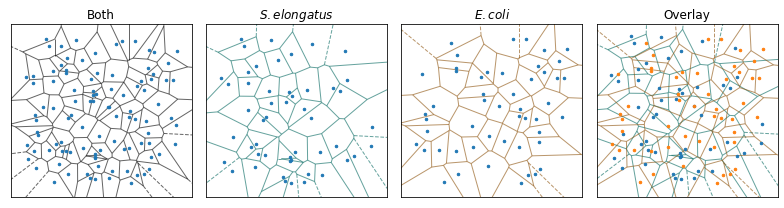

In [53]:
pt = 5
lw = 1
f, ax = plt.subplots(figsize=(11,3),ncols=4)
vor = Voronoi(df[['x','y']].to_numpy())
voronoi_plot_2d(vor, show_vertices=False, line_width=lw, line_alpha=0.6, point_size=pt,ax=ax[0])
vor = Voronoi(df.loc[df.type==1][['x','y']].to_numpy())
voronoi_plot_2d(vor, show_vertices=False, line_colors="#01665e",line_width=lw, line_alpha=0.6, point_size=pt,ax=ax[1])
voronoi_plot_2d(vor, show_vertices=False, line_colors="#01665e",line_width=lw, line_alpha=0.6, point_size=pt,ax=ax[3])
vor = Voronoi(df.loc[df.type==2][['x','y']].to_numpy())
voronoi_plot_2d(vor, show_vertices=False, line_colors="#8c510a",line_width=lw, line_alpha=0.6, point_size=pt,ax=ax[2])
voronoi_plot_2d(vor, show_vertices=False, line_colors="#8c510a",line_width=lw, line_alpha=0.6, point_size=pt,ax=ax[3])
#fig = voronoi_plot_2d(vor)



#_ =plot.colony(x,1000,by='Species',fitness=metrics,ax=ax)
ax[0].set_title('Both')
ax[1].set_title(r'$\it{S. elongatus}$')
ax[2].set_title(r'$\it{E. coli}$')
ax[3].set_title('Overlay')
for ax in ax.ravel():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
f.tight_layout()
f.savefig('../figures/voronoi-talk.png',bbox_inches='tight',dpi=600)
plt.show()

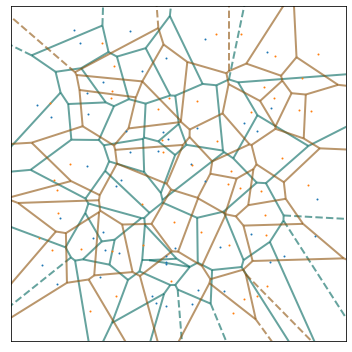

In [49]:
f, ax = plt.subplots(figsize=(5,5))

vor = Voronoi(df.loc[df.type==1][['x','y']].to_numpy())
voronoi_plot_2d(vor, show_vertices=False, line_colors="#01665e",line_width=2, line_alpha=0.6, point_size=2,ax=ax)
vor = Voronoi(df.loc[df.type==2][['x','y']].to_numpy())
voronoi_plot_2d(vor, show_vertices=False, line_colors="#8c510a",line_width=2, line_alpha=0.6, point_size=2,ax=ax)


ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
f.tight_layout()

plt.show()